# Description

This notebook is part of an assignment made during the subject of Computational Intelligence, 7th semester at Federal University of Pará.

Professor: Aldebaro Klautau

Authors:

- Bruno Santos Martins
- Claudio Matheus Modesto

## Packages

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

## Assure the libraries have the same version as used throughout the code

In [ ]:
assert mpl.__version__ == '3.5.3'
assert pd.__version__ == '1.3.5'
assert np.__version__ == '1.19.5'

## Read dataset

In [3]:
DATASET_ROOT_PATH = '../datasets/svm_homework/'

VALIDATION_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_validation.txt')
TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_train.txt')
TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_test.txt')

In [4]:
validation = pd.read_csv(VALIDATION_PATH, header=None)
train = pd.read_csv(TRAIN_PATH, header=None)
test = pd.read_csv(TEST_PATH, header=None)

## Separate features from labels

In [5]:
X_train, X_test, X_val = train.iloc[:, :-1], test.iloc[:, :-1], validation.iloc[:, :-1]
y_train, y_test, y_val = train.iloc[:, -1], test.iloc[:, -1], validation.iloc[:, -1]

## First Question

### Item (A):


LinearSVC = 2 errors

SVC with linear kernel = 1 errors

SVC with RBF kernel = 1 errors

SVC with polynomial = 0 errors

### Item (B):

The top-right SVM looks the best. Although it has an error, the classes are in general more splitted apart in terms of margin compared to the other models. This will make the model less susceptible to outliers and noisy data.

## Second Question

In sckit-learn there is a hyperparameter that crontols the quantities of support vectors of a model. This parameter is called C. Therefore, it works in this way: if C is substantially a high value, then, the numbers of support vectors will be smaller. Alternatively, if C is considerably a low value, then, the quantities of support vectors will be huge. A great example of this, can be seen in picture below, where it is possible verify the behavior of the amount of support vectors and the width of the way when the C value takes on two different values.

![SVM_C_values](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/C_values_SVM.png)

In the words, the width of the way between the convex-hull and the hyperplan of the model will be minor for the high value of C, and larger for the low value of C. Provoking, respectively, a decrease of support vectors and an increase of them.

## Third Question

A prediction using A SVM is made using the formula:


$ f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}K(z,x_{n}) \right) + b $

For a perceptron, the decision function can be written as:
     
$f(z) = sgn(<w, x> + b)$

The Cost $C$ is defined as:

$ C = n_{mult} + n_{sum}$

For a dot product, there are K multiplications and K - 1 sums. If we consider the bias, one more
sum operation will be made. The lambda multiplication counts as one. In that case:

$C_{original} = N * (2K - 1 + 1) + 1$

$C_{original} = N * 2K + 1$

With $C_{original} = N * 2K + 1 $. Assuming there are 450 support vectors, the first equation will give a zero $\lambda$ for most of the training examples. Thus, we don't need to keep many of the examples, only the support vectors.

A perceptron doesn't hold the training data and thus doesn't depend on the number of lambdas. Hence, it's cost is given by:

$C_{perceptron} = 2K - 1 + 1$

$C_{perceptron} = 2K$

The total cost is:


$F = \dfrac{N * 2K + 1}{2K}$

## Fourth Question

svm.n_support_= [1 2]

svm.support_vectors_= [[ 1. 4.] [-2.  3.] [-2. -5.]]

svm.dual_coef_= [[-0.5 -0.3 0.8]]

svc.intercept_= [-2]

### Item (A):
Considering these attributes above, there is below the decision model:

$f(z) = -0.5 \times <z, [1, 4]>  -0.3 \times <z, [-2, 3]> + 0.8 \times <z, [1, 4]> -2$


### Item (B):
For a SVM as a perceptron it's quite similar to the previous models, nevertheless, there is important difference, as we'll see in the next:

First of all, it's known that weight $w$ of perceptron defintion ($f(z)= <z, w> + b$) is defined by:

$w = \displaystyle\sum_{i = 0}^{N-1}\lambda_{i} x_i$

where $\lambda$ in sckit-learn API is identified by a variable called *dual_coef_*.

Therefore, using the general definition of SVM and the associative property of dot product, there is the development of definition of SVM as a perceptron:

$f(z) = \left(\displaystyle\sum_{i = 0}^{N-1}\lambda_{i}K(z, x_i)\right) + b$

- Assuming that is a linear kernel:

$f(z) = \left(\displaystyle\sum_{i = 0}^{N-1}\lambda_{i}<z, x_i>\right) + b$

- And finally, using associative property of dot product:

$f(z) = <z, \displaystyle\sum_{i = 0}^{N-1}\lambda_{i}x_i> + b$

$f(z) = <z, w> + b$

Now, applying this definition for the SVM in this problem, we have the final result:

$f(z) = <z, [-0.5, 2]> + <z, [0.6, 0.9]> + <z, [-1.6, -4]> -2$

### item (C):
First of all considering $I(f(z))$ "indicative" function, where is defined like this:

$I(f(z))=\begin{cases}
    1, & f(z) > 0\\
    0, & \text{otherwise}.
  \end{cases}$

So, evaluating $f(z)$ for $z = [0, 0]$, we have this:

$f([0, 0]) = -0.5 \times <[0, 0], [1, 4]>  -0.3 \times <[0, 0], [-2, 3]> + 0.8 \times <[0, 0], [1, 4]> -2$

It's quite clear that dot product between a vector at origin and any other vector result in value 0. Therefore, the result of these three dot product is 0. So:

$f([0, 0]) = 0 - 2$

$f([0, 0]) = -2$

Using this result in "indicative" function, we have this:

$I(f([0, 0])) = 0$

## Fifth Question

The general equation is given by:

$f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}K(z,x_{n}) \right) + b$

#### Item (A):

First of all, it's important to write the correct formula for the kernels. 
Those are given by:

Poly:

$ K(z,x_{n}) = <z, x_{n}>^{p}$, p = 3

RBF:

$K(z,x_{n}) = e^{- \gamma||z - x_{n}||^{2}} $, $\gamma = 0.7$

For the 3th case we have:

$b = -0.08 \\ $ 

$\lambda \in \left[-0.917,-0.913, -0.913, 0.871, 0.871, 1\right] \\ $ 

$x \in \left[(0, -4), (-1, 2), (3, 3), (-5, -6), (-4, -5), (-2, -2)\right]$

$N = 6$ 

Hence, the decision function is given by:

$f(z) = \left(\lambda_{0}<z, (\alpha_{0}, \beta_{0})>^3 + \lambda_{1}<z, (\alpha_{1}, \beta_{1})>^3 + \lambda_{2}<z, (\alpha_{2}, \beta_{2})>^3 + \lambda_{3}<z, (\alpha_{3}, \beta_{3})>^3 + \lambda_{4}<z, (\alpha_{4}, \beta_{4})>^3 + \lambda_{5}<z, (\alpha_{5}, \beta_{5})>^3 \right) - 0.08$

$f(z) = \left(-0.917<z, (0, -4)>^3 - 0.913<z, (-1, 2)>^3 - 0.913<z, (3, 3)>^3 + 0.871 <z, (-5, -6)>^3 +  0.871<z, (-4, -5)>^3 + <z, (-2, -2)>^3 \right) - 0.08$

For the 4th case:

$b = -1.79 $

$\lambda \in \left[-0.45, -0.27, 0.73\right]  $

$x \in \left[(0, -4), (-1, 2), (-2, -2)\right]$

$N = 3$


$f(z) = \left(-0.45 e^{- 0.7||z - (0, -4)||^{2}}- 0.27 e^{- 0.7||z - (-1, 2)||^{2}} + 0.73 e^{- 0.7||z - (-2, -2)||^{2}} \right) - 1.79$

For the linear case, $k(z, x_{n}) = <z, x_{n}>$

And,

$b = -1.79 $

$\lambda \in \left[-0.45, -0.279,  0.73\right] $

$x \in \left[(0, -4), (-1, 2), (-2, -2)\right]$

$N = 3$

Hence,

$f(z) = \left(-0.45<z, (0, -4)> - 0.27<z, (-1, 2)> + 0.73<z, (-2, -2)> \right) - 1.79 $

#### Item (B):

Originally, the function is given by:

$f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}<z,x_{n}> \right) + b$

Where:

$w = \sum\limits_{n = 0}^{N - 1}\lambda_{n}x_{n}$

Considering the linearity of the dot product, $f(z)$ can be rewritten as:

$f(z) = \left(\sum\limits_{n = 0}^{N - 1}<z,\lambda_{n}x_{n}> \right) + b$

$f(z) = \left(<z,\sum\limits_{n = 0}^{N - 1}\lambda_{n}x_{n}> \right) + b$

$f(z) = \left(<z, w> \right) + b$

For the first SVM, w is given by:

$ w = \begin{bmatrix}-0.68 \\ -0.1 \end{bmatrix}$

$ b = -0.99$

Hence, we have:

$f(z) = z_{0}w_{0} + z_{1}w_{1} - 0.99$

$f(z) = -0.68z_{0} - 0.1z_{1} - 0.99$

For the second SVM:

$w = \sum\limits_{n = 0}^{N - 1}\lambda_{n}x_{n}$, N = 3

$w = \lambda_{0}x_{0} + \lambda_{1}x_{1} + \lambda_{2}x_{2}$

$w = - 0.45 \begin{bmatrix} 0 \\ -4 \end{bmatrix} - 0.27\begin{bmatrix} -1 \\ 2 \end{bmatrix}  + 0.73 \begin{bmatrix} -2 \\ -2 \end{bmatrix} $

$ w = \begin{bmatrix} 0 \\ 1.8 \end{bmatrix} + \begin{bmatrix} 0.27 \\ -0.54 \end{bmatrix} - \begin{bmatrix} 1.46 \\ 1.46\end{bmatrix} $

$ w = \begin{bmatrix} 0 + 0.27 - 1.46 \\ 1.8 - 0.54 - 1.46\end{bmatrix}$

$w = \begin{bmatrix} -1.19 \\ -0.2 \end{bmatrix}$

Finally:

$f(z) = z_{0}w_{0} + z_{1}w_{1} + b, \hspace{0.2cm} b = -1.8$

$f(z) = -1.19z_{0} - 0.2z_{1} - 1.8$

#### Item (C):

First, the weight vector can be written as:

$w = \sum\limits_{n = 0}^{N - 1}\lambda_{n}x_{n}$

The question provides us the values of $\lambda$ and $x$. Thus, the summation becomes:

$w = \lambda_{0}x_{0} + \lambda_{1}x_{1} + \lambda_{2}x_{2}$

$w = -0.45\begin{bmatrix} 0\\ -4\end{bmatrix} -0.28 \begin{bmatrix}-1 \\ 2 \end{bmatrix} + 0.74 \begin{bmatrix} -2\\ -2\end{bmatrix}$

$ w = \begin{bmatrix} 0 \\ 1.8 \end{bmatrix} + \begin{bmatrix} 0.27 \\ -0.54 \end{bmatrix} - \begin{bmatrix} 1.46 \\ 1.46\end{bmatrix} $

$ w = \begin{bmatrix} 0 + 0.27 - 1.46 \\ 1.8 - 0.54 - 1.46\end{bmatrix}$

$w = \begin{bmatrix} -1.19 \\ -0.2 \end{bmatrix}$

Now that we have the weight vector, the decision function can be written as:

$f(z) = z_{0}w_{0} + z_{1}w_{1} + b, \hspace{0.2cm} b = -1.8$

$f(z) = -1.19z_{0} - 0.2z_{1} - 1.8$

In a previous question, we deduced a formula to measure the efficiency of this conversion. The formula is:

$F = \dfrac{N * 2K + 1}{2K}$

Where N is the number of support vectors and K is the number of features. Thus, $F$ is:

$F = \dfrac{3 * 2 * 2 + 1}{2 * 2}$

$F = \dfrac{13}{4}$


#### Item (D):

##### subitem (D1):

For the third SVM there are 6 support vectors

For the fourth SVM there are 3 support vectors

##### subitem (D2):

SVM 3: 0 1 2 3 4 5 (indexes)

SVM 4: 0 1 5 (indexes)

SVM 3: -0.91722233 -0.91351914 -0.91300432  0.87185969  0.8718861   1.

SVM 4: -0.00887134 -0.03133903  0.04021037

##### subitem (D3):

SVM 3: -0.08676121

SVM 4: -1.03731897

#### Item (E):

In [6]:
x = np.linspace(-1.1, 1.1, num=10000)

points = [-1.00027976, -1.00027976, -0.99977173,  1.00010297,  1.00022828,  0.90993821]

sgn_values = np.sign(x)

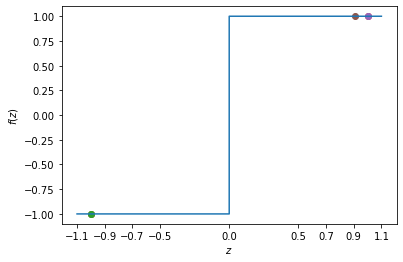

In [7]:
plt.step(x, sgn_values)
plt.ylabel('$f(z)$')
plt.xlabel('$z$')
for point in points:
    plt.scatter(point, np.sign(point))
_ = plt.xticks([-1.1, -0.9, -0.7, -0.5, 0, 0.5, 0.7, 0.9, 1.1])

We can see that the point closest to 0 is the least reliable.

## Sixth Question

In [8]:
## Method obtained by Ageron's github repository
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


(-2.0, 2.0, -2.0, 2.0)

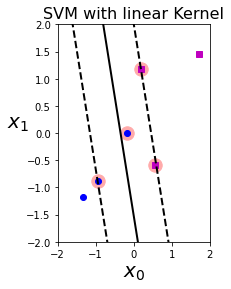

In [9]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

## Preprocessing the train and test dataset w/ standard scaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

# Train the model
svc = svm.SVC(kernel ='linear', C = 1).fit(X_scaled_train, y_train)

# Plot the chart
plt.subplot(122)
plt.plot(X_scaled_train[:, 0][y_train==1], X_scaled_train[:, 1][y_train==1], "bo")
plt.plot(X_scaled_train[:, 0][y_train==0], X_scaled_train[:, 1][y_train==0], "ms")
plot_svc_decision_boundary(svc, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("SVM with linear Kernel", fontsize=16)
plt.axis([-2, 2, -2, 2])

Some information about the model

In [10]:
print(f'Number of Support Vectors: {svc.n_support_}')
print(f'Support Vectors Index: {svc.support_}')
print(f'Support Vectors: \n{svc.support_vectors_}')

Number of Support Vectors: [2 2]
Support Vectors Index: [0 1 4 5]
Support Vectors: 
[[ 0.57035183 -0.58554004]
 [ 0.19011728  1.17108009]
 [-0.95058638 -0.87831007]
 [-0.19011728  0.        ]]


### Results in test dataset

In [11]:
## get the labels
y = np.ravel(test[2],order='C')
print(f'\n\nLabels: {y}\nPredict: {svc.predict(X_scaled_test)}')



Labels: [0 0 1 1]
Predict: [0 0 1 1]


### SVM to Perceptron

In [12]:
def svm_to_perceptron(support_vectors, dual_coef):
    dual_coef = np.ravel(dual_coef, order='C')
    num_support_vectors = len(dual_coef)
    if support_vectors.shape[0] != num_support_vectors:
        raise Exception('support_vectors.shape[0] != num_support_vectors')
    input_space_dimension = support_vectors.shape[1]
    perceptron_weights = np.zeros((input_space_dimension))
    for sv in range(num_support_vectors):
        perceptron_weights += dual_coef[sv] * support_vectors[sv]
    return perceptron_weights

w = svm_to_perceptron(svc.support_vectors_, svc.dual_coef_)
print(f'W by Manual conversion: {w}')
print(f'W by sklearn API: {svc.coef_}')

W by Manual conversion: [-1.24413145 -0.28340857]
W by sklearn API: [[-1.24413145 -0.28340857]]


### Performance Considerations

The third question shows us that has a several difference in performance between SVM and Perceptron models. In this way, we can start with memory performance as in perceptron, this model doesn't hold the training dataset, hence, it just evaluate the weight $w$ of its definition ($f(z) = <z, w> + b$). Inversely, in SVM approach it's necessary keep this training dataset as this model depeding of $\lambda$ value for each support vector.

Now, about computational performace, the third question also show, that computational cost of SVM depend, besides the N support vectors, of $K$ multiplications and $K-1$ sums operations. Meanwhile, the perceptron doesn't depend of the number of $N$ support vectors, only the quantities of multiplications and sums operations. 

$C_{svm} = N \times (2K + 1)$

$C_{perceptron} = 2K$

## Seventh Question

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [14]:
X = np.concatenate((X_train, X_val), axis=0)
Y = np.concatenate((y_train, y_val), axis=0)

parameters = {'C': [0.01, 1, 100], 'gamma': [0.5, 1]}

idx = [-1] * len(X_train) + [0] * len(X_val)

cv = PredefinedSplit(test_fold=idx)

scaler = StandardScaler()
    
model = SVC(kernel='rbf')

grid = GridSearchCV(estimator = model, cv=cv, param_grid=parameters)


grid_pipe = Pipeline([('scaler', scaler), ('grid', grid)])

grid_pipe.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('grid',
                 GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0])),
                              estimator=SVC(),
                              param_grid={'C': [0.01, 1, 100],
                                          'gamma': [0.5, 1]}))])

In [15]:
grid.best_params_

{'C': 100, 'gamma': 0.5}

In [16]:
grid.best_score_

0.875

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

SVC()

In [18]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
print("support vectors", model.n_support_)
print("Indexes", model.support_)
print("coef",  model.dual_coef_)
print("bias ", model.intercept_)


support vectors [3 3]
Indexes [0 1 2 3 4 5]
coef [[-1.         -0.86322887 -0.4050294   0.84052685  0.42773142  1.        ]]
bias  [-0.32862725]


In [20]:
y_pred = model.predict(X_test)

In [21]:
np.array(y_test)

array([0, 0, 1, 1])

In [23]:
y_pred

array([0, 0, 1, 1])

In [22]:
model.decision_function(X_test)

array([-0.94104311, -0.69442929,  0.4634211 ,  0.61067449])